# Clustering Handwritten Digits using Mixture of Bernoulli Distributions

This is documentation of a personal project to learn and apply Bernoulli Mixture Models approach for unsupervised learning of handwritten digits dataset.<br>

<b>Reference/Inspiration</b>: <b><i> Pattern Recognition and Machine Learning</i></b> by <i> Christopher M. Bishop.</i> Chapter 9, Figure 9.10.<br>
<b>Dataset</b>: <a href="http://mldata.org/repository/data/viewslug/mnist-original/">MNIST</a> Handwritten Digits. <br>
<b>Model</b>: Bernoulli Mixture Models<br>
<b>Algorithm</b>: Expectation-Maxization

# Mixture of Bernoulli Distribution

First, consider a single multivariate Bernoulli distribution of $D$ independent binary variables $x_i \in \{0, 1\}$, where $i = 1,...,D$, each of which is in turn a univariate Bernoulli distribtion with parameter $\mu_i$, 


$$p(\mathbf{x}\,|\, \boldsymbol{\mu}) = \displaystyle\prod_{i=1}^D \mu_i^{x_i}(1-\mu_i)^{(1-x_i)} $$ 

where, $\mathbf{x} = (x_1,...,x_D)^T$, and  $\boldsymbol{\mu} = (\mu_1,...,\mu_D)^T$.

Now consider a finite mixture of $K$ multivariate Bernoulli distributions given by,

$$p(\mathbf{x}\,|\, \boldsymbol{\mu}, \boldsymbol{\pi}) = \displaystyle\sum_{k=1}^K  \pi_k p(\mathbf{x}\,|\,\boldsymbol{\mu}_k)$$ <br>

where,<br>
<br>$\boldsymbol\mu = \{\boldsymbol\mu_1,...,\boldsymbol\mu_K\}$ 
or
 $\mu_{ki} =
 \begin{pmatrix}  
  \mu_{11} & \mu_{12} & \cdots & \mu_{1D} \\
  \mu_{2,1} & \mu_{22} & \cdots & \mu_{2D} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \mu_{K1} & \mu_{K2} & \cdots & \mu_{KD} 
 \end{pmatrix}$,
$\boldsymbol\pi = \{\pi_1,...,\pi_K\}$, and

$$p(\mathbf{x}\,|\, \boldsymbol{\mu}_k) = \displaystyle\prod_{i=1}^D \mu_ki^{x_i}(1-\mu_{ki})^{(1-x_i)} $$ 

Given a data set of $\mathbf{X} = \left\{\mathbf{x}_1,...,\mathbf{x}_N\right\}$, with each observation represented as a mixture of K Bernoulli distributions, then the log likelihood function is:

$$\mathrm{ln}\,p(\mathbf{X}\,|\,\boldsymbol{\mu},\boldsymbol{\pi}) = \displaystyle\sum_{n=1}^N\mathrm{ln}\left\{\displaystyle\sum_{k=1}^K \pi_{k}\,p(\mathbf{x}_n\,|\,\boldsymbol{\mu}_k)\right\}$$

The appearance of the summation inside the logarithm in the above function means maximixum likelihood solution no longer has a closed form solution.

To maximize the log likelihood function using Expection-Maximization approach, consider an explicit latent variable $\mathbf{z}$ associated with each observation $\mathbf{x}$, where $\mathbf{z}=(z_1,...,z_K)^T$ is a binary K-dimensional variable having a single component equal to 1, and all others set to 0. The latent variable $\mathbf{z}$ can be considered as a membership indicator for each observation. The marginal distribution of $\mathbf{z}$ is specified in terms of the mixing coefficients $\pi_k$, such that $p(z_k = 1) =\,\pi_k$, or

$$p(\mathbf{z}\,|\,\boldsymbol{\pi}) = \displaystyle\prod_{k=1}^K \pi_k^{z_k}$$

We can write the conditional distribution of $\mathbf{x}$, given the latent variable as

$$p(\mathbf{x}\,|\,\mathbf{z},\boldsymbol{\mu}) = \displaystyle\prod_{k=1}^K\,p(\mathbf{x}\,|\,\boldsymbol{\mu}_k)^{z_k}$$

Now formulate the probability of the compelte-data (observed $\mathbf{x}$ and latent $\mathbf{z}$) using Bayes' theorem, $p(\mathbf{x},\mathbf{z}) = p(\mathbf{x}\,|\,\mathbf{z})\,p(\mathbf{z})$.

For the complete-data, the probability is

$$
\begin{align*}
 p(\mathbf{X},\mathbf{Z}\,|\,\boldsymbol{\mu},\boldsymbol{\pi}) &= \displaystyle\prod_{n=1}^{N}\,p(\mathbf{x}\,|\,\mathbf{z},\boldsymbol{\mu})\,p(\mathbf{z}\,|\,\boldsymbol{\pi}) \\
     &=\displaystyle\prod_{n=1}^{N}\,\displaystyle\prod_{k=1}^{K} \pi_{k}^{z_{nk}} \left( p(\mathbf{x}\,|\,\mu_{k}\right)^{z_{nk}} \\
    & = \displaystyle\prod_{n=1}^{N}\,\displaystyle\prod_{k=1}^{K} \pi_{k}^{z_{nk}} \left( \displaystyle\prod_{i=1}^D \mu_{ki}^{x_{ni}}(1-\mu_{ki})^{(1-x_{ni})}\right)^{z_{nk}} \\
\end{align*}
$$

The corresponding complete-data log likelihood functions is:

$$
\begin{align*}
\mathrm{ln}\,p(\mathbf{X},\mathbf{Z}\,|\,\boldsymbol{\mu},\boldsymbol{\pi}) &= \displaystyle\sum_{n=1}^{N}\,\displaystyle\sum_{k=1}^{K} z_{nk} \left\{ \mathrm{ln}\,\left(\pi_{k}\,\displaystyle\prod_{i=1}^D \mu_{ki}^{x_{ni}}(1-\mu_{ki})^{(1-x_{ni})}\right)\right\}\\
&=\displaystyle\sum_{n=1}^{N}\,\displaystyle\sum_{k=1}^{K} z_{nk} \left\{\mathrm{ln}\,\pi_{k}+ \displaystyle\sum_{i=1}^D \mathrm{ln}\,\left(\mu_{ki}^{x_{ni}}(1-\mu_{ki})^{(1-x_{ni})}\right)\right\}\\
&=\displaystyle\sum_{n=1}^{N}\,\displaystyle\sum_{k=1}^{K} z_{nk} \left\{\mathrm{ln}\,\pi_{k}+ \displaystyle\sum_{i=1}^D \left[x_{ni}\,\mathrm{ln}\,\mu_{ki}+(1-x_{ni})\,\mathrm{ln}\,(1-\mu_{ki})\right]\right\}\\
\end{align*}
$$

Notice that the above log likelihood function can be considered as a linear combination of $z_{nk}$. Since the expectation of a sum is the sum of the expectations, we can write the expectation of the complete-data log likelihood functions with respect to the posterior distribution of the latent variable as:

$$
\mathbb{E}\left[\mathrm{ln}\,p(\mathbf{X},\mathbf{Z}\,|\,\boldsymbol{\mu},\boldsymbol{\pi})\right] = \displaystyle\sum_{n=1}^{N}\,\displaystyle\sum_{k=1}^{K} \gamma(z_{nk}) \left\{\mathrm{ln}\,\pi_{k}+ \displaystyle\sum_{i=1}^D \left[x_{ni}\,\mathrm{ln}\,\mu_{ki}+(1-x_{ni})\,\mathrm{ln}\,(1-\mu_{ki})\right]\right\}
$$

where, $\gamma(z_{nk}) = \mathbb{E}[z_{nk}]$ is the posterior probability or responsibility of the mixture component $k$ given the data point $x_n$.
<br>
## E-M Algorithm for the Mixture of Bernoulli Distributions:
With the above background, the E-M algorithm takes the following form.
<br>
<b>E-Step</b>:<br>
Calculation of the responsibilites make the E step of the E-M algorithm.
$$
\gamma(z_{nk})\,=\,\mathbb{E}\left[z_{nk}\right]\,=\,\frac{\pi_{k}\,p(\mathbf{x}_n\,|\,\boldsymbol{\mu}_k)}{\displaystyle\sum_{j=1}^K\,\pi_j\,p(\mathbf{x}_n\,|\,\boldsymbol{\mu}_j)}
$$
<br>
<b>M-Step</b>:  
Maximizing the expectation of the complete-data log likelihood with respect to $\boldsymbol\mu_k$ and $\boldsymbol\pi_k$ yields the M step of the E-M algorithm:

$$
\boldsymbol\mu_k\,=\,\frac{1}{N_k}\displaystyle\sum_{n=1}^N\,\gamma(z_{nk})\mathbf{x}_n
$$ and
$$
\pi_{k}\,=\,\frac{N_k}{N}
$$
where, $N_k\,=\,\displaystyle\sum_{n=1}^N\,\gamma(z_{nk})$ 

<br>





In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
mnist.data.shape
'''
MNIST data is in grey scale [0, 255].
Convert it to a binary scale using a threshold of 128.
'''
mnist3 = (mnist.data/128).astype('int')

In [47]:
def show(image):
    '''
    Function to plot the MNIST data
    '''
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=plt.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()

In [3]:
def bernoulli(data, means):
    '''To compute the probability of x for each bernouli distribution
    data = N X D matrix
    means = K X D matrix
    prob (result) = N X K matrix 
    '''
    N = len(data)
    K = len(means)
    #compute prob(x/mean)
    # prob[i, k] for ith data point, and kth cluster/mixture distribution
    prob = np.zeros((N, K))
    
    for i in range(N):
        for k in range(K):
            prob[i,k] = np.prod((means[k]**data[i])*((1-means[k])**(1-data[i])))
    
    return prob

In [4]:
def respBernoulli(data, weights, means):
    '''To compute responsibilities, or posterior probability p(z/x)
    data = N X D matrix
    weights = K dimensional vector
    means = K X D matrix
    prob or resp (result) = N X K matrix 
    '''
    #step 1
    # calculate the p(x/means)
    prob = bernoulli(data, means)
    
    #step 2
    # calculate the numerator of the resp.s
    prob = prob*weights
    
    #step 3
    # calcualte the denominator of the resp.s
    row_sums = prob.sum(axis=1)[:, np.newaxis]
    
    # step 4
    # calculate the resp.s
    try:
        prob = prob/row_sums
        return prob
    except ZeroDivisionError:
        print("Division by zero occured in reponsibility calculations!")
            
    

In [5]:
def bernoulliMStep(data, resp):
    '''Re-estimate the parameters using the current responsibilities
    data = N X D matrix
    resp = N X K matrix
    return revised weights (K vector) and means (K X D matrix)
    '''
    N = len(data)
    D = len(data[0])
    K = len(resp[0])
    
    Nk = np.sum(resp, axis=0)
    mus = np.empty((K,D))
    
    for k in range(K):
            mus[k] = np.sum(resp[:,k][:,np.newaxis]*data,axis=0) #sum is over N data points
            try:
                mus[k] = mus[k]/Nk[k]   
            except ZeroDivisionError:
                print("Division by zero occured in Mixture of Bernoulli Dist M-Step!")
                break           
    
    return (Nk/N, mus)

In [6]:
def llBernoulli(data, weights, means):
    '''To compute expectation of the loglikelihood of Mixture of Beroullie distributions
    Since computing E(LL) requires computing responsibilities, this function does a double-duty
    to return responsibilities too
    '''
    N = len(data)
    K = len(means)
    
    resp = respBernoulli(data, weights, means)
    
    ll = 0
    for i in range(N):
        sumK = 0
        for k in range(K):
            try:
                temp1 = ((means[k]**data[i])*((1-means[k])**(1-data[i])))
                temp1 = np.log(temp1.clip(min=1e-50))
                
            except:
                print("Problem computing log(probability)")
            sumK += resp[i, k]*(np.log(weights[k])+np.sum(temp1))
        ll += sumK
    
    return (ll, resp)

In [17]:
def mixOfBernoulliEM(data, init_weights, init_means, maxiters=1000, relgap=1e-4, verbose=False):
    '''EM algo fo Mixture of Bernoulli Distributions'''
    N = len(data)
    D = len(data[0])
    K = len(init_means)
    
    #initalize
    weights = init_weights[:]
    means = init_means[:]
    ll, resp = llBernoulli(data, weights, means)
    ll_old = ll
    
    for i in range(maxiters):
        if verbose and (i % 5 ==0):
            print("iteration {}:".format(i))
            print("   {}:".format(weights))
            print("   {:.6}".format(ll))
            
        #E Step: calculate resps
        #Skip, rolled into log likelihood calc
        #For 0th step, done as part of initialization
            
        #M Step
        weights, means = bernoulliMStep(data, resp)
        
        #convergence check
        ll, resp = llBernoulli(data, weights, means)
        if np.abs(ll-ll_old)<relgap:
            print("Relative gap:{:.8} at iternations {}".format(ll-ll_old, i))
            break
        else:
            ll_old = ll
            
    return (weights, means)

In [38]:
from sklearn.utils import shuffle

def pickData(digits, N):
    sData, sTarget = shuffle(mnist3, mnist.target, random_state=30)
    returnData = np.array([sData[i] for i in range(len(sData)) if sTarget[i] in digits])
    return shuffle(returnData, n_samples=N, random_state=30)

def experiments(digits, K, N, iters=50):
    '''
    Picks N random points of the selected 'digits' from MNIST data set and
    fits a model using Mixture of Bernoulli distributions.
    And returns the weights and means.
    '''
    
    expData = pickData(digits, N)
    
    D = len(expData[0])

    initWts = np.random.uniform(.25,.75,K)
    tot = np.sum(initWts)
    initWts = initWts/tot
    
    #initMeans = np.random.rand(10,D)
    initMeans = np.full((K, D), 1.0/K)

    return mixOfBernoulliEM(expData, initWts, initMeans, maxiters=iters, relgap=1e-15)

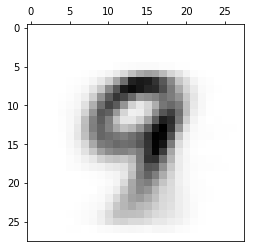

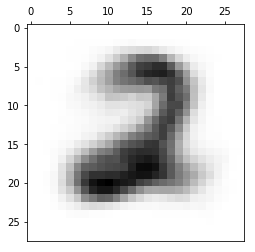

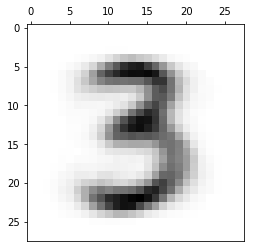

[None, None, None]

In [39]:
finWeights, finMeans = experiments([2,3,9], 3, 1000)
[show(finMeans[i].reshape(28,28)) for i in range(len(finMeans))]

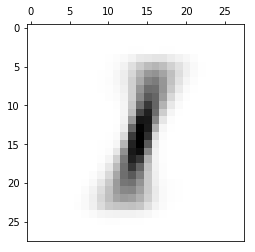

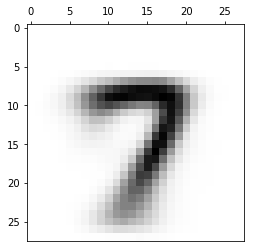

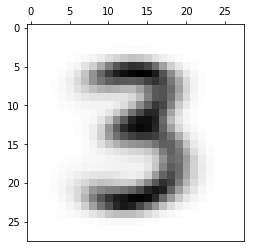

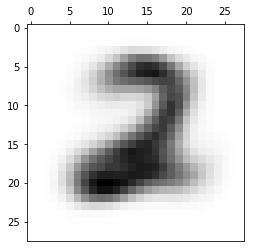

[ 0.26757071  0.24729179  0.23207817  0.25305934]


In [43]:
finWeights, finMeans = experiments([1,2,3,7], 4, 5000)
[show(finMeans[i].reshape(28,28)) for i in range(len(finMeans))]
print(finWeights)

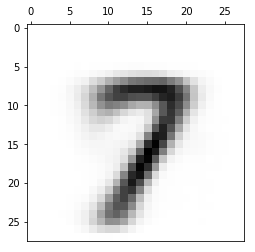

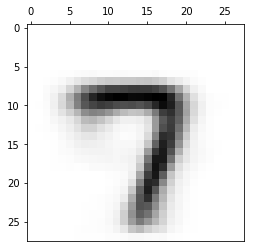

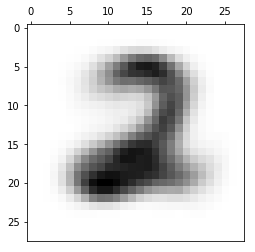

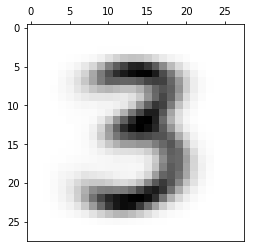

[ 0.1912005   0.15238828  0.34022079  0.31619044]


In [51]:
finWeights, finMeans = experiments([2,3,7], 4, 3000)
[show(finMeans[i].reshape(28,28)) for i in range(len(finMeans))]
print(finWeights)